In [26]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import numpy as np

In [27]:
# Loading extracted poicount data from jointdata and making it easy to work with
df_poicount = pd.read_csv('category_count_per_route.csv')
df_poicount.fillna(0, inplace = True) # replacing NaN values with 0s
df_poicount = df_poicount.apply(np.int64)
df_poicount.rename(columns={"wp_count": "wp", "poi_count": "poi", "tree_count": "tree", "bench_count": "bench", "bench_count.1": "restaurant", "cafe_count": "cafe", "atm_count": "atm", "convenience_count": "convenience", "bar_count": "bar", "ice_cream_count": "ice_cream", "picnic_table_count": "picnic", "viewpoint_count": "viewpoint", "gallery_count": "gallery", "museum_count": "museum", "nightclub_count": "nightclub", "drinking_water_count": "drinking_water", "historic_count": "historic", "tourist_attraction_count": "t_attraction"}, inplace=True)
df_poicount.head()

,route_id,wp,poi,tree,bench,restaurant_count,cafe,atm,convenience,bar,ice_cream,picnic,viewpoint,gallery,museum,nightclub,drinking_water,historic,t_attraction
0,3503504,8,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2713522,8,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3568200,8,18,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3503503,8,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3573326,9,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
x = df_poicount
sc = SpectralClustering(n_clusters=3).fit(x)
print(sc)

SpectralClustering(n_clusters=3)


/Users/mervebduman/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [29]:
SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=3, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None) 

SpectralClustering(n_clusters=3)

In [35]:
labels = sc.labels_

plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()  

TypeError: '(slice(None, None, None), 0)' is an invalid key

# Trying another tutorial

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [46]:
# Loading extracted poicount data from jointdata and making it easy to work with
df_poicount = pd.read_csv('category_count_per_route.csv')
df_poicount.fillna(0, inplace = True) # replacing NaN values with 0s
df_poicount = df_poicount.apply(np.int64)
df_poicount.rename(columns={"wp_count": "wp", "poi_count": "poi", "tree_count": "tree", "bench_count": "bench", "bench_count.1": "restaurant", "cafe_count": "cafe", "atm_count": "atm", "convenience_count": "convenience", "bar_count": "bar", "ice_cream_count": "ice_cream", "picnic_table_count": "picnic", "viewpoint_count": "viewpoint", "gallery_count": "gallery", "museum_count": "museum", "nightclub_count": "nightclub", "drinking_water_count": "drinking_water", "historic_count": "historic", "tourist_attraction_count": "t_attraction"}, inplace=True)
df_poicount.head()

,route_id,wp,poi,tree,bench,restaurant_count,cafe,atm,convenience,bar,ice_cream,picnic,viewpoint,gallery,museum,nightclub,drinking_water,historic,t_attraction
0,3503504,8,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2713522,8,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3568200,8,18,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3503503,8,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3573326,9,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


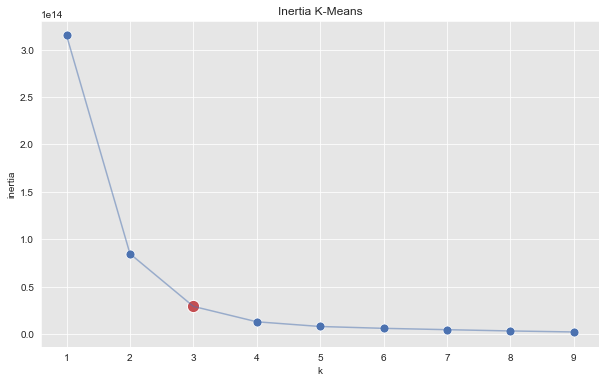

In [47]:
from sklearn.cluster import KMeans

inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df_poicount)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

ValueError: Could not interpret value `x` for parameter `x`

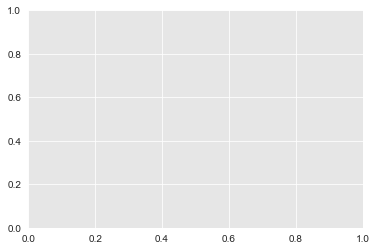

In [48]:
k_means = KMeans(n_clusters=3)
k_means.fit(df_poicount)
cluster = k_means.predict(df_poicount)

cluster = ['k-means_c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=df_poicount.assign(cluster = cluster), hue='cluster', ax=ax)
ax.set(title='K-Means Clustering');

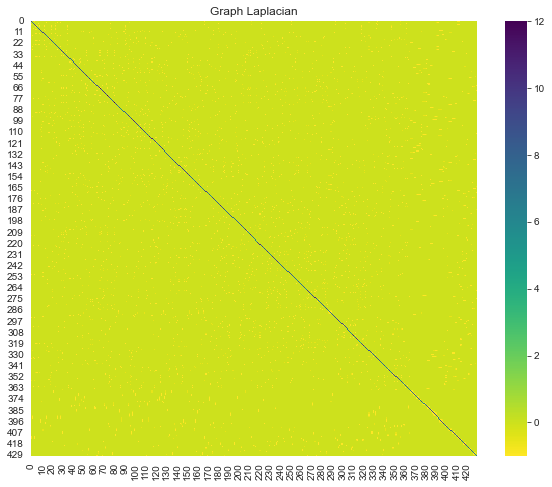

In [49]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=df_poicount, nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [50]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)

In [51]:
np.unique(np.imag(eigenvals))

array([-2.55109829e-15,  0.00000000e+00,  2.55109829e-15])

In [53]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [54]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.8806443030122343
Max Norm: 1.0000000000000009


In [55]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

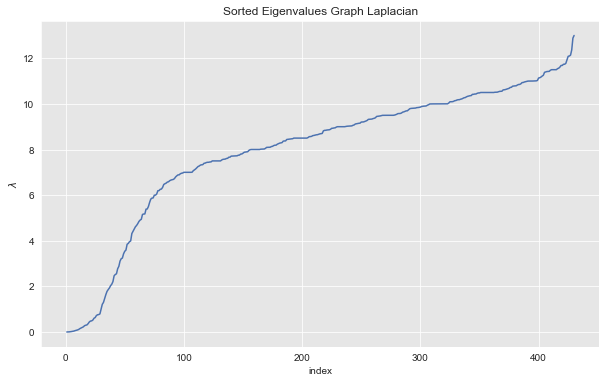

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');


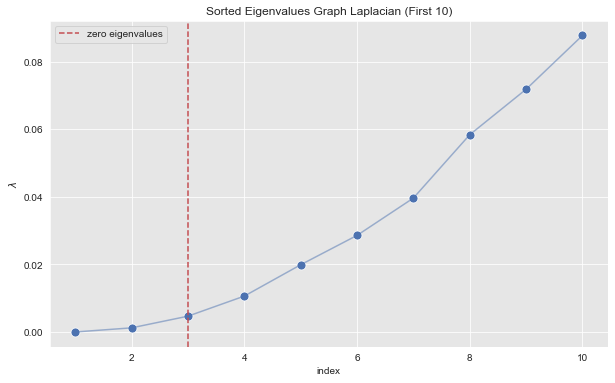

In [57]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');


In [58]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 1e-5)
eigenvals[zero_eigenvals_index]

array([[-7.24680732e-16]])

In [59]:
proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
proj_df.head()

,v_0
0,-0.048224
1,-0.048224
2,-0.048224
3,-0.048224
4,-0.048224


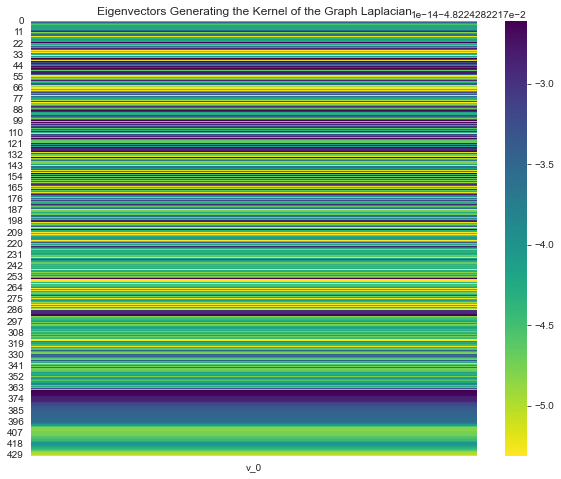

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');


In [61]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]

    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df

In [62]:
inertias = []

k_candidates = range(1, 6)

for k in k_candidates:
    k_means = KMeans(n_clusters=k)
    k_means.fit(proj_df)
    inertias.append(k_means.inertia_)

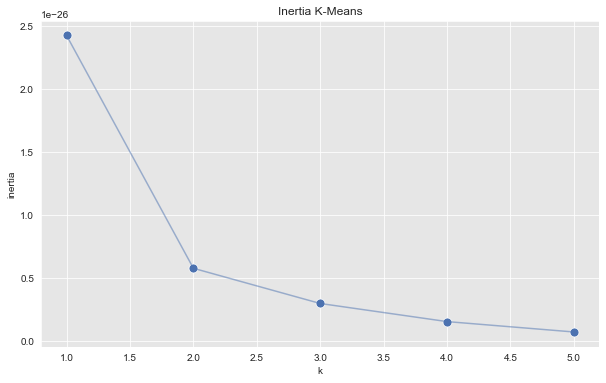

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');


In [68]:
kmeans_kwargs = {"init": "random", "n_init": 50, "max_iter": 500}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_poicount)
    sse.append(kmeans.inertia_)
sse

[314862190415868.75,
 84602413541613.66,
 29099937921402.992,
 12870794248655.703,
 7895301099489.284,
 6490216282676.838,
 4682779345736.715,
 3430276157017.524,
 2122412086703.5903,
 2902247312127.4834]

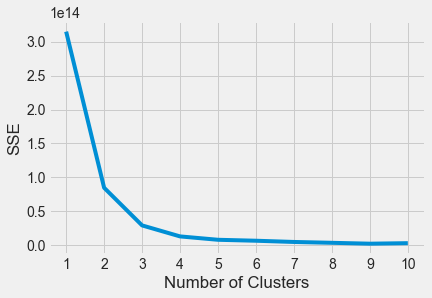

In [69]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [71]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [75]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_poicount)
    score = silhouette_score(df_poicount, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.7375277057950856,
 0.7543535528044495,
 0.7675395998308483,
 0.7400258522643154,
 0.7321131371731763,
 0.5830755139724767,
 0.608395068900262,
 0.6186267591190009,
 0.6096049242754755]

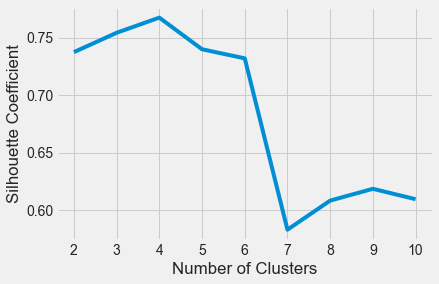

In [76]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [77]:
def run_k_means(df_poicount, n_clusters):
    """K-means clustering."""
    k_means = KMeans(n_clusters=n_clusters)
    k_means.fit(df_poicount)
    cluster = k_means.predict(df_poicount)
    return cluster

cluster = run_k_means(proj_df, n_clusters=3)

KeyError: 'v_1'

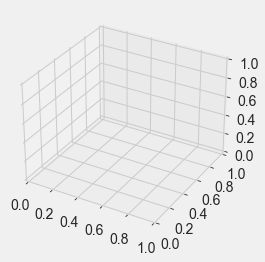

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=proj_df['v_0'], 
    ys=proj_df['v_1'], 
    zs=proj_df['v_2'],
    c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('Small Eigenvectors Clusters', x=0.2);

ValueError: Could not interpret value `x` for parameter `x`

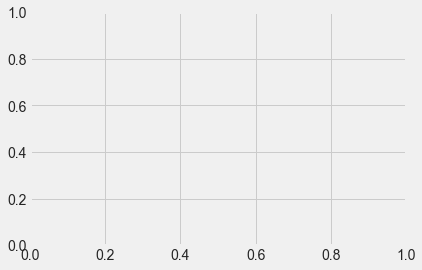

In [80]:
df_poicount['cluster'] = ['c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=df_poicount, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering');